In [16]:
from FLM import FLM
meteor=FLM()

2023-05-11 20:12:54,235 INFO:	COMLOG_SERVER: __init__()	(3.90272972972973e-05, 0.09963448675675676)
2023-05-11 20:12:54,237 DEBUG:	COMLOG_SERVER: light_set_channel()	requested channel: reflection
2023-05-11 20:12:54,249 ERROR:	COMLOG_SERVER: cam_set_exposure()	Measuredxposure time: 0.050001189459459465 s
2023-05-11 20:12:54,273 DEBUG:	COMLOG_SERVER: __init__()	METEOR connection finished!


In [23]:
import time

meteor.disconnect()
del meteor

2023-05-11 20:55:10,429 DEBUG:	COMLOG_SERVER: disconnect()	Disconnected gracefully, no need to restart the XT-server!


In [17]:
#meteor.autofocus()
stack =meteor.start_acquisition(15e-6,3e-6,['reflection'],[4],[.01],focus_pos={'z':10.3e-3})

2023-05-11 20:13:04,306 INFO:	COMLOG_SERVER: autofocus()	Starting autofocus.
2023-05-11 20:13:04,308 DEBUG:	COMLOG_SERVER: light_set_channel()	requested channel: reflection
2023-05-11 20:13:04,314 ERROR:	COMLOG_SERVER: cam_set_exposure()	Measuredxposure time: 0.010006162432432433 s
2023-05-11 20:13:20,768 DEBUG:	COMLOG_SERVER: find_focus_from_stack()	Max Score: 8673232.212578336
2023-05-11 20:13:20,769 DEBUG:	COMLOG_SERVER: find_focus_from_stack()	Index of max focus Value: 10
2023-05-11 20:13:21,374 DEBUG:	COMLOG_SERVER: autofocus()	New Focus position: {'z': 0.01055}
2023-05-11 20:13:21,377 DEBUG:	COMLOG_SERVER: light_set_channel()	requested channel: reflection
2023-05-11 20:13:21,386 ERROR:	COMLOG_SERVER: cam_set_exposure()	Measuredxposure time: 0.010006162432432433 s
2023-05-11 20:13:43,773 DEBUG:	COMLOG_SERVER: find_focus_from_stack()	Max Score: 27008463.204493206
2023-05-11 20:13:43,774 DEBUG:	COMLOG_SERVER: find_focus_from_stack()	Index of max focus Value: 24
2023-05-11 20:13:44,0

In [ ]:
## Test performace in acquisition loop

import numpy as np
import time
toc = []
for i in range(30):
    meteor.cam_dev.start_generate()
    meteor.cam_dev.ResetCaptureStatus()
    img= meteor.cam_dev.data.get(asap=False)
    meteor.cam_dev.stop_generate()
    tic = time.time()
    img2 = np.transpose(img).astype(np.uint16)
    toc2 = float(time.time() - tic)
    toc.append(toc2)


print('Elapsed time: mean:{}, std: {}'.format(np.mean(toc),np.std(toc)))

Elapsed time: mean:0.0012964646021525065, std: 0.00033693679178177553


In [ ]:
# Camera testing for this STUPID error!
# tic = time.time()
# meteor.cam_dev.start_generate()
# meteor.cam_dev.ResetCaptureStatus()
# test_img_old= meteor.cam_dev.data.get(asap=False)
# meteor.cam_dev.stop_generate()

# meteor.cam_dev.start_generate()
# meteor.focus_set_rel({'z': -0.1e-3})
# meteor.cam_dev.ResetCaptureStatus()
# test_img = meteor.cam_dev.data.get(asap=False)
# meteor.cam_dev.stop_generate()
# toc = time.time() - tic

# print('Current ecapture status: {}'.format(meteor.cam_dev.GetCaptureStatus()))
# print('Elapsed time: {}'.format(toc))

# plt.imshow(test_img_old)
# plt.show()
# plt.imshow(test_img)
# plt.show()


# for i in range(20):
#     if i == 10:
#         meteor.focus_set_rel({'z': 0.1e-3})
#     meteor.cam_dev.start_generate()
#     meteor.cam_dev.ResetCaptureStatus()
#     test_img = meteor.cam_dev.data.get(asap=True)
#     meteor.cam_dev.stop_generate()

#     print(i)
#     plt.imshow(test_img)
#     plt.show()


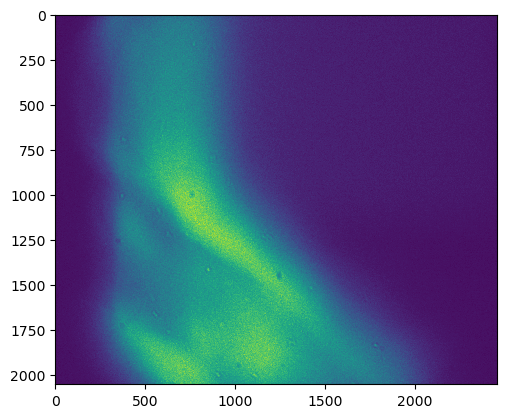

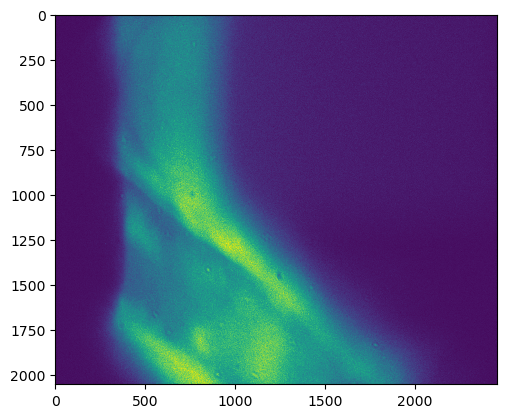

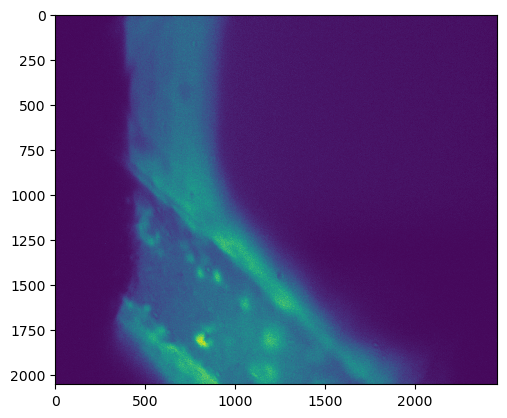

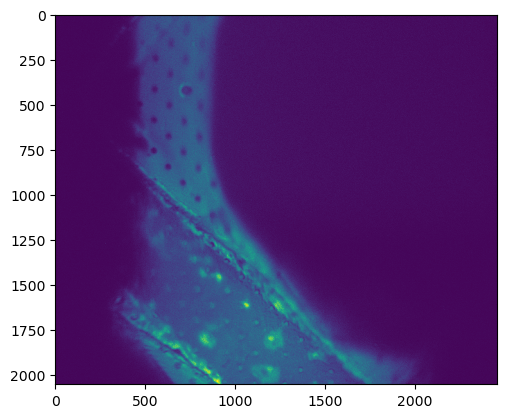

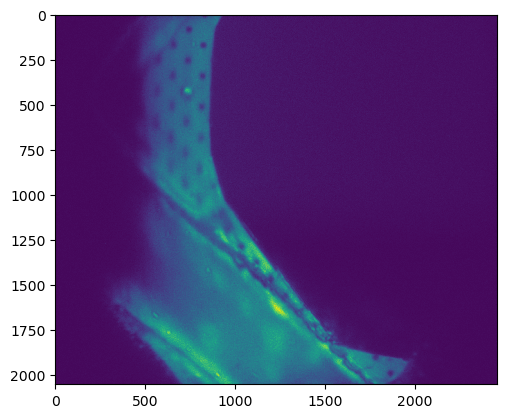

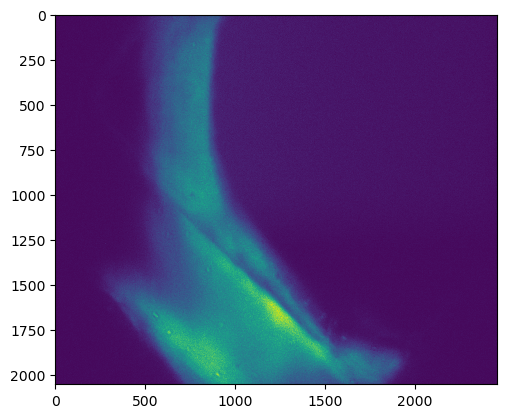

In [18]:
import matplotlib.pyplot as plt
import numpy as np
for i in range(0,stack.shape[1],1):
    plt.imshow(stack[0,i,0,:,:])
    plt.show()